# Project Description: Exploratory Data Analysis (EDA) for Measuring Transformer Health

## Overview

This project focuses on performing Exploratory Data Analysis (EDA) on a dataset related to the health assessment of measurement transformer. The dataset comprises various gas concentrations and electrical properties critical for evaluating the condition and performance of these transformer. The columns in the dataset are:

- **Hydrogen**: Concentration of hydrogen gas, often used to detect insulation degradation.
- **Oxygen**: Concentration of oxygen gas, which can be relevant in evaluating chemical reactions in the transformer's environment.
- **Nitrogen**: Concentration of nitrogen gas, which might be involved in insulation or environmental conditions.
- **Methane**: Concentration of methane gas, a potential indicator of insulation breakdown.
- **CO (Carbon Monoxide)**: Concentration of carbon monoxide gas, which can signify insulation or operational issues.
- **CO2 (Carbon Dioxide)**: Concentration of carbon dioxide gas, which may reflect chemical reactions or degradation processes.
- **Ethylene**: Concentration of ethylene gas, often linked to insulation degradation.
- **Ethane**: Concentration of ethane gas, another indicator of insulation degradation.
- **Acetylene**: Concentration of acetylene gas, associated with severe insulation failure.
- **DBDS (Dibenzyl Disulfide)**: Concentration of dibenzyl disulfide, a key indicator of the health of insulation materials.
- **Power Factor**: A measure of the efficiency of electrical power usage, reflecting the health of the electrical system.
- **Interfacial V**: Voltage between different materials or phases, indicative of insulation integrity.
- **Dielectric Rigidity**: Ability of the insulation material to withstand electrical stress, crucial for transformer health.
- **Water Content**: Amount of water present, affecting insulation performance and overall health of the transformer.
- **Health Index**: A composite score or metric representing the overall health and condition of the transformer.

## Objectives

1. **Data Cleaning**: Assess and handle missing values, outliers, and inconsistencies to ensure data quality for reliable analysis.
2. **Descriptive Statistics**: Compute and analyze basic statistics (mean, median, mode, standard deviation) for each column to understand distributions and central tendencies.
3. **Data Visualization**: Generate visualizations (e.g., histograms, scatter plots, box plots) to explore distributions, relationships between variables, and trends.
4. **Correlation Analysis**: Examine correlations between gas concentrations, electrical properties, and the health index to identify key indicators of transformer health.
5. **Trend Analysis**: Investigate trends over time or across different conditions if temporal data is available.
6. **Feature Importance**: Evaluate the importance of each feature in predicting the health index or assessing transformer condition using statistical methods or machine learning techniques.
7. **Anomaly Detection**: Identify any anomalies or unusual patterns that could indicate potential issues with the transformer’s health or performance.

## Expected Outcomes

- Insightful understanding of how different gas concentrations and electrical properties relate to the overall health of the measurement transformer.
- Visualizations and statistical summaries that reveal important patterns, trends, and relationships in the data.
- Identification of critical features and indicators for transformer health assessment, leading to more informed maintenance and operational decisions.
- Recommendations for further data collection or analysis based on observed findings and potential anomalies.

This EDA will provide valuable insights into the health and performance of measurement transformer, supporting better maintenance strategies and operational efficiency.


-----------------------------
## About Me

### Syed Mansoor ul Hassan Bukhari

I am a 6th-semester student pursuing a Bachelor of Science in Artificial Intelligence (BS(AI)) at the University of Azad Jammu & Kashmir. My academic focus is on data analysis, machine learning, and artificial intelligence applications.

- **Institution**: University of Azad Jammu & Kashmir
- **Program**: BS(AI) - 6th Semester
- **GitHub**: [cyberfantics](https://github.com/cyberfantics)

Feel free to connect with me or explore my projects on GitHub. If you have any questions or need further information, don't hesitate to ask!


-----------------------------------

## Load Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load DataSet

In [2]:
df = pd.read_csv('Health index2.csv')

In [3]:
# Columns In Data Set
df.columns

Index(['Hydrogen', 'Oxygen', 'Nitrogen', 'Methane', 'CO', 'CO2', 'Ethylene',
       'Ethane', 'Acethylene', 'DBDS', 'Power factor', 'Interfacial V',
       'Dielectric rigidity', 'Water content', 'Health index'],
      dtype='object')

#### Shape of dataset

In [4]:
df.shape

(470, 15)

#### Head

In [5]:
df.head()

Hydrogen  Oxygen  Nitrogen  Methane   CO   CO2  Ethylene  Ethane  \
0      2845    5860     27842     7406   32  1344     16684    5467   
1     12886      61     25041      877   83   864         4     305   
2      2820   16400     56300      144  257  1080       206      11   
3      1099      70     37520      545  184  1402         6     230   
4      3210    3570     47900      160  360  2130         4      43   

   Acethylene  DBDS  Power factor  Interfacial V  Dielectric rigidity  \
0           7  19.0          1.00             45                   55   
1           0  45.0          1.00             45                   55   
2        2190   1.0          1.00             39                   52   
3           0  87.0          4.58             33                   49   
4           4   1.0          0.77             44                   55   

   Water content  Health index  
0              0          95.2  
1              0          85.5  
2             11          85.3  
3              5          85.3  
4              3          85.2

# 1. Data Cleaning

### 1.1. Check For Missing Values

In [6]:
df.isna().sum()

Hydrogen               0
Oxygen                 0
Nitrogen               0
Methane                0
CO                     0
CO2                    0
Ethylene               0
Ethane                 0
Acethylene             0
DBDS                   0
Power factor           0
Interfacial V          0
Dielectric rigidity    0
Water content          0
Health index           0
dtype: int64

**Note:** This dataset contains `no missing value,` so we `skip step two` which is `handle missing values`.

### 1.2. Check For Duplicate Values

In [7]:
# Check for duplicate rows
duplicates = df.duplicated().sum()

In [8]:
duplicates

0

**Note:** This dataset contains `no duplicate value`, so we skip step to `drop duplicates`

### 1.3. Check for Incorrect Data 
Incorrect data can include out-of-range values, unexpected data types, and logically inconsistent values. Here's how to identify and handle these:

#### 1.3.1. Out-of-Range Values

**Power Factor**

In [9]:
# Check if 'Power factor' is within the range [0, 1]
out_of_range_power_factor = df[(df['Power factor'] < 0) | (df['Power factor'] > 1)]

In [10]:
print(f"Number of rows with 'Power factor' > 1: {len(out_of_range_power_factor)}")

Number of rows with 'Power factor' > 1: 113


In [11]:
print("\nOut-of-range 'Power factor' values:\n", out_of_range_power_factor[['Power factor']].head(20))


Out-of-range 'Power factor' values:
     Power factor
3           4.58
5           4.93
6           3.53
10          1.32
19         42.10
22          1.27
26          1.24
29          1.16
34          1.71
36          4.45
38         71.75
39         67.67
40         73.20
42          1.90
50          4.40
61          1.68
64          1.15
71          1.82
81          1.02
83          1.55


**Normalize Power Factor**

In [12]:
# Define a function to normalize 'Power factor' values
def normalize_power_factor(value):
    if value > 10:
        return min(1, value / 100) # Scaling by 100
    elif value > 1:
        return min(1, value / 10) # Scaling by 10
    return value


In [13]:
# Apply the normalization function
df['Power factor'] = df['Power factor'].apply(normalize_power_factor)

In [14]:
# Verify that all values are within the correct range now
print("\nUnique values in 'Power factor' after normalization:\n\n", df['Power factor'].unique())


Unique values in 'Power factor' after normalization:
 [1.     0.458  0.77   0.493  0.353  0.58   0.29   0.27   0.132  0.65
 0.44   0.421  0.25   0.127  0.16   0.23   0.124  0.45   0.116  0.19
 0.171  0.445  0.48   0.7175 0.6767 0.732  0.63   0.12   0.44   0.37
 0.57   0.82   0.15   0.17   0.13   0.21   0.32   0.168  0.115  0.9
 0.14   0.38   0.182  0.3    0.52   0.102  0.155  0.205  0.149  0.89
 0.335  0.28   0.8    0.41   0.86   0.55   0.35   0.08   0.943  0.62
 0.147  0.844  0.36   0.138  0.06   0.95   0.09   0.2    0.24   0.11
 0.158  0.26   0.72   0.141  0.71   0.22   0.54   0.39   0.1    0.159
 0.78   0.17   0.59   0.105  0.46   0.07   0.393  0.193  0.31   0.53
 0.5    0.556  0.293  0.107  0.237  0.323  0.295  0.254  0.101  0.616
 0.234  0.186  0.208  0.249  0.296  0.287  0.278  0.535  0.256  0.304
 0.422  0.338  0.324  0.262  0.429  0.43   0.259  0.275  0.325  0.297
 0.283  0.317  0.93   0.937  0.255  0.6    0.33   0.81   0.64   0.398
 0.67   0.137  0.261  0.218  0.314  0.214  0

**Verify Data Cleaning on Power Factor**

In [21]:
# Check if there are any remaining values greater than 1
print("Number of rows with 'Power factor' > 1 after normalization:", df[df['Power factor'] > 1].shape[0])


Number of rows with 'Power factor' > 1 after normalization: 0


In [22]:
print("Number of rows with 'Power factor' < 0 after normalization:", df[df['Power factor'] < 0].shape[0])


Number of rows with 'Power factor' < 0 after normalization: 0


#### 1.3.2. Value Ranges and Distributions
Visualize distributions to identify unusual patterns or outliers:

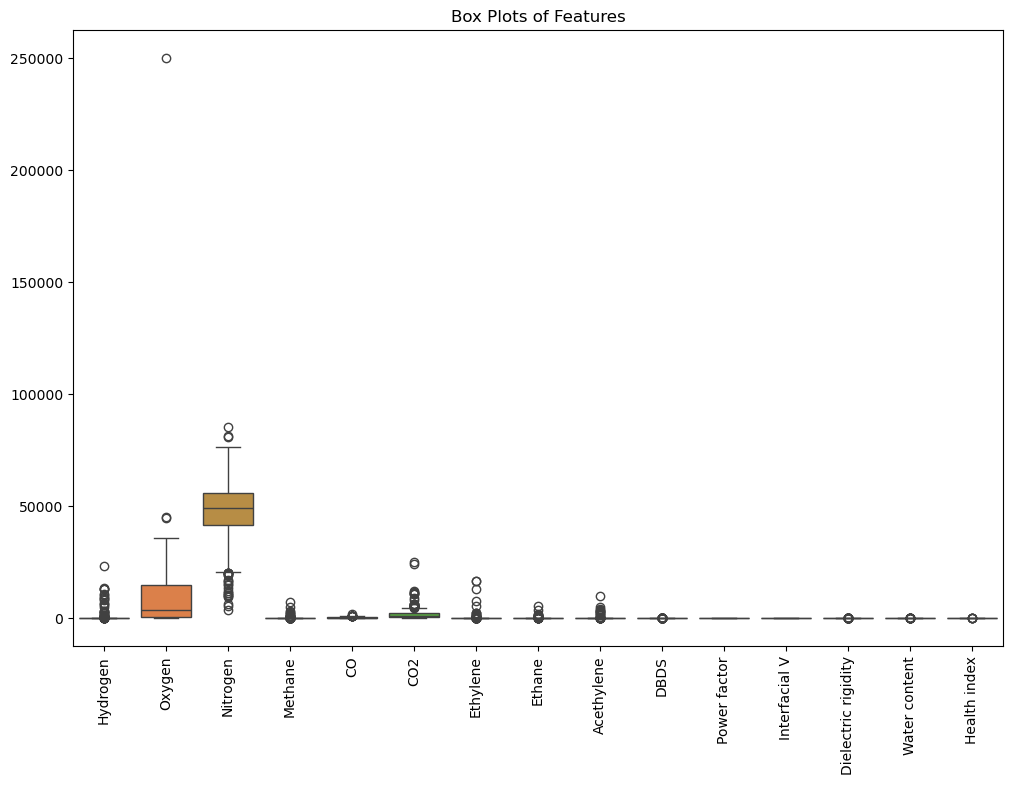

In [26]:
# Plot box plots to identify outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['Hydrogen', 'Oxygen', 'Nitrogen', 'Methane', 'CO', 'CO2', 'Ethylene', 'Ethane', 'Acethylene', 'DBDS', 'Power factor', 'Interfacial V', 'Dielectric rigidity', 'Water content', 'Health index']])
plt.xticks(rotation=90)
plt.title('Box Plots of Features')
plt.show()

**Looks like Some Columns have outliers, Let’s analyze outliers in the Oxygen, Hydrogen, CO2, Nitrogen, and Ethylene columns one by one. The analysis will involve:**

* Filtering Values: Identifying values that are outliers.
* Finding Extremes: Determining maximum and minimum values.
* Top 5 Maximum Values: Listing the top 5 highest values.

**`Oxygen`**

In [28]:
# Filter outliers (values significantly above the mean)
oxygen_mean = df['Oxygen'].mean()
oxygen_std = df['Oxygen'].std()
oxygen_outliers = df[df['Oxygen'] > (oxygen_mean + 3 * oxygen_std)]

In [29]:
# Maximum and minimum values
oxygen_max = df['Oxygen'].max()
oxygen_min = df['Oxygen'].min()

In [30]:
# Top 5 maximum values
top_5_oxygen_max = df.nlargest(5, 'Oxygen')[['Oxygen']]

In [44]:
print("Oxygen Analysis:")
print("----------------------------------------------")
print("Maximum value:", oxygen_max)
print("Minimum value:", oxygen_min)

print("\n-----------------------------------------\nTop 5 maximum values:\n-----------------------------------------\n", top_5_oxygen_max)

print("----------------------------------------------")
print("\n-----------------------------------------\nOutliers:\n-----------------------------------------\n", oxygen_outliers[['Oxygen']])
print("----------------------------------------------")

Oxygen Analysis:
----------------------------------------------
Maximum value: 249900
Minimum value: 57

-----------------------------------------
Top 5 maximum values:
-----------------------------------------
      Oxygen
45   249900
395   45100
250   44788
121   35700
100   30800
----------------------------------------------

-----------------------------------------
Outliers:
-----------------------------------------
     Oxygen
45  249900
----------------------------------------------


In [63]:
df.shape

(470, 15)

In [69]:
df = df[df['Oxygen'] < 249900] # Drop Row Where Outlier Occurs

In [68]:
df.shape

(469, 15)

**Hydrogen**

In [45]:
# Filter outliers (values significantly above the mean)
hydrogen_mean = df['Hydrogen'].mean()
hydrogen_std = df['Hydrogen'].std()

In [46]:
# Maximum and minimum values
hydrogen_max = df['Hydrogen'].max()
hydrogen_min = df['Hydrogen'].min()

In [47]:
# Top 5 maximum values
top_5_hydrogen_max = df.nlargest(5, 'Hydrogen')[['Hydrogen']]

In [50]:
print("\nHydrogen Analysis:")
print("Maximum value:", hydrogen_max)
print("Minimum value:", hydrogen_min)
print("\nTop 5 maximum values:\n", top_5_hydrogen_max)


Hydrogen Analysis:
Maximum value: 23349
Minimum value: 0

Top 5 maximum values:
     Hydrogen
13     23349
5      13500
15     13200
1      12886
35     12880

Outliers:
     Hydrogen
1      12886
5      13500
6      10200
13     23349
14      9040
15     13200
16      6620
17      8710
35     12880
36     10700
38      9350
41      7907


In [70]:
df.shape

(469, 15)

In [71]:
df = df[df['Hydrogen'] < 23349] # Drop Row Where Outlier Occurs

In [72]:
df.shape

(468, 15)

**CO2**

In [51]:
# Filter outliers (values significantly above the mean)
co2_mean = df['CO2'].mean()
co2_std = df['CO2'].std()
co2_outliers = df[df['CO2'] > (co2_mean + 3 * co2_std)]

In [52]:

# Maximum and minimum values
co2_max = df['CO2'].max()
co2_min = df['CO2'].min()

In [53]:

# Top 5 maximum values
top_5_co2_max = df.nlargest(5, 'CO2')[['CO2']]



In [54]:

print("\nCO2 Analysis:")
print("Maximum value:", co2_max)
print("Minimum value:", co2_min)
print("\nTop 5 maximum values:\n", top_5_co2_max)
print("\nOutliers:\n", co2_outliers[['CO2']])



CO2 Analysis:
Maximum value: 24900
Minimum value: 48

Top 5 maximum values:
        CO2
19   24900
361  24200
456  12000
185  11700
117  11300

Outliers:
        CO2
19   24900
39   10600
40    8930
117  11300
176  11100
185  11700
333  10600
361  24200
456  12000


In [73]:
df.shape

(468, 15)

In [74]:
df = df[df['CO2'] < 24200] # Drop Row Where Outlier Occurs

In [75]:
df.shape

(466, 15)

**Nitrogen**

In [55]:
# Filter outliers (values significantly above the mean)
nitrogen_mean = df['Nitrogen'].mean()
nitrogen_std = df['Nitrogen'].std()
nitrogen_outliers = df[df['Nitrogen'] > (nitrogen_mean + 3 * nitrogen_std)]

In [56]:
# Maximum and minimum values
nitrogen_max = df['Nitrogen'].max()
nitrogen_min = df['Nitrogen'].min()

In [57]:
# Top 5 maximum values
top_5_nitrogen_max = df.nlargest(5, 'Nitrogen')[['Nitrogen']]

In [58]:

print("\nNitrogen Analysis:")
print("Maximum value:", nitrogen_max)
print("Minimum value:", nitrogen_min)
print("\nTop 5 maximum values:\n", top_5_nitrogen_max)
print("\nOutliers:\n", nitrogen_outliers[['Nitrogen']])



Nitrogen Analysis:
Maximum value: 85300
Minimum value: 3600

Top 5 maximum values:
      Nitrogen
121     85300
63      81300
24      80800
156     76582
59      76500

Outliers:
 Empty DataFrame
Columns: [Nitrogen]
Index: []


**Note:** `No Outliers Detected`

**Ethylene**

In [59]:
# Filter outliers (values significantly above the mean)
ethylene_mean = df['Ethylene'].mean()
ethylene_std = df['Ethylene'].std()
ethylene_outliers = df[df['Ethylene'] > (ethylene_mean + 3 * ethylene_std)]


In [60]:

# Maximum and minimum values
ethylene_max = df['Ethylene'].max()
ethylene_min = df['Ethylene'].min()



In [61]:
# Top 5 maximum values
top_5_ethylene_max = df.nlargest(5, 'Ethylene')[['Ethylene']]


In [62]:

print("\nEthylene Analysis:")
print("Maximum value:", ethylene_max)
print("Minimum value:", ethylene_min)
print("\nTop 5 maximum values:\n", top_5_ethylene_max)
print("\nOutliers:\n", ethylene_outliers[['Ethylene']])



Ethylene Analysis:
Maximum value: 16684
Minimum value: 0

Top 5 maximum values:
     Ethylene
0      16684
15     16400
16     13100
14      7820
13      5588

Outliers:
     Ethylene
0      16684
13      5588
14      7820
15     16400
16     13100


In [76]:
df.shape

(466, 15)

In [77]:
df = df[df['Ethylene'] < 13100] # Drop Row Where Outlier Occurs

In [78]:
df.shape

(463, 15)

#### Visculize Again

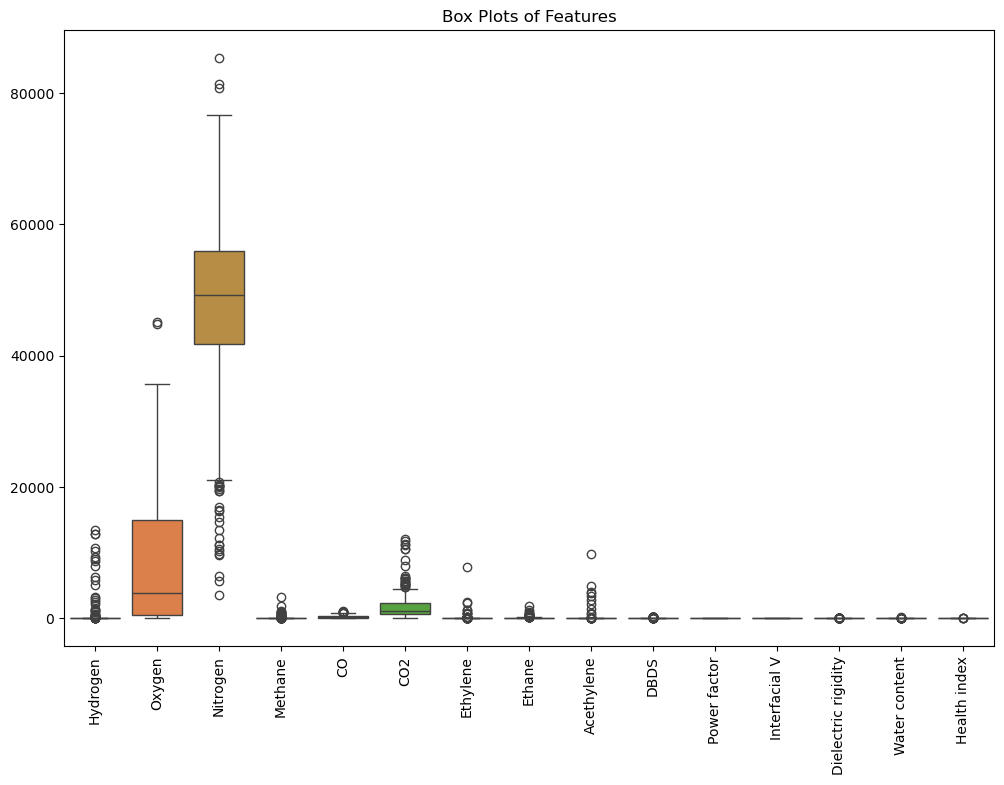

In [79]:
# Plot box plots to identify outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['Hydrogen', 'Oxygen', 'Nitrogen', 'Methane', 'CO', 'CO2', 'Ethylene', 'Ethane', 'Acethylene', 'DBDS', 'Power factor', 'Interfacial V', 'Dielectric rigidity', 'Water content', 'Health index']])
plt.xticks(rotation=90)
plt.title('Box Plots of Features')
plt.show()

# 2. Descriptive Statistics
`Generate basic statistics to understand the distribution and central tendencies of the data.`

In [15]:
# Basic statistics
print("Basic statistics:")
df.describe()

Basic statistics:


Hydrogen         Oxygen      Nitrogen      Methane           CO  \
count    470.000000     470.000000    470.000000   470.000000   470.000000   
mean     404.261702    8357.372340  47759.561702    79.695745   244.000000   
std     2002.142678   14164.233283  13760.451816   489.320336   237.267485   
min        0.000000      57.000000   3600.000000     0.000000    10.000000   
25%        4.000000     496.000000  41700.000000     2.000000    66.000000   
50%        9.000000    3810.000000  49100.000000     3.000000   150.500000   
75%       34.000000   14875.000000  55875.000000     7.000000   361.750000   
max    23349.000000  249900.000000  85300.000000  7406.000000  1730.000000   

                CO2      Ethylene       Ethane   Acethylene        DBDS  \
count    470.000000    470.000000   470.000000   470.000000  470.000000   
mean    1816.414894    162.923404    81.940426    91.491489   17.036596   
std     2256.790519   1323.811504   342.573636   644.365828   46.735057   
min       48.000000      0.000000     0.000000     0.000000    0.000000   
25%      641.750000      0.000000     0.000000     0.000000    0.000000   
50%     1125.000000      3.000000     4.000000     0.000000    0.000000   
75%     2257.500000      6.000000    69.750000     0.000000    2.000000   
max    24900.000000  16684.000000  5467.000000  9740.000000  227.000000   

       Power factor  Interfacial V  Dielectric rigidity  Water content  \
count    470.000000     470.000000           470.000000     470.000000   
mean       0.623890      38.434043            53.495745      16.282979   
std        0.364593       6.178830             6.458906      17.115646   
min        0.050000      21.000000            27.000000       0.000000   
25%        0.260250      32.000000            51.000000       5.000000   
50%        0.620000      39.000000            54.000000      12.000000   
75%        1.000000      44.000000            56.000000      21.000000   
max        1.000000      57.000000            75.000000     183.000000   

       Health index  
count    470.000000  
mean      27.504043  
std       17.741458  
min       13.400000  
25%       13.400000  
50%       13.400000  
75%       38.550000  
max       95.200000

**Compute median for each column**

In [80]:
median_values = df.median(numeric_only=True)

In [81]:
print("\nMedian values:\n", median_values)


Median values:
 Hydrogen                   9.0
Oxygen                  3760.0
Nitrogen               49200.0
Methane                    3.0
CO                       148.0
CO2                     1110.0
Ethylene                   3.0
Ethane                     4.0
Acethylene                 0.0
DBDS                       0.0
Power factor               0.6
Interfacial V             39.0
Dielectric rigidity       54.0
Water content             12.0
Health index              13.4
dtype: float64


**Compute mode for each column**
* `Mode might return multiple values; take the first mode for each column`

In [82]:
mode_values = df.mode(numeric_only=True).iloc[0]

In [85]:
print("\nMode values:\n", mode_values)


Mode values:
 Hydrogen                   0.0
Oxygen                 15700.0
Nitrogen               56700.0
Methane                    2.0
CO                        54.0
CO2                     2750.0
Ethylene                   0.0
Ethane                     0.0
Acethylene                 0.0
DBDS                       0.0
Power factor               1.0
Interfacial V             32.0
Dielectric rigidity       55.0
Water content              4.0
Health index              13.4
Name: 0, dtype: float64


**Compute standard deviation for each column**

In [87]:
std_deviation = df.std(numeric_only=True)
print("\nStandard Deviation:\n", std_deviation)


Standard Deviation:
 Hydrogen                1571.323608
Oxygen                  8763.738435
Nitrogen               13759.114430
Methane                  204.424122
CO                       227.250548
CO2                     1707.384683
Ethylene                 409.438571
Ethane                   141.724750
Acethylene               612.406480
DBDS                      47.047149
Power factor               0.364686
Interfacial V              6.126530
Dielectric rigidity        6.430012
Water content             16.973246
Health index              17.274086
dtype: float64


# 3. Data Visculization

### 1. Generate Histograms
Histograms show the distribution of a single variable. They are useful for understanding the frequency distribution of data.

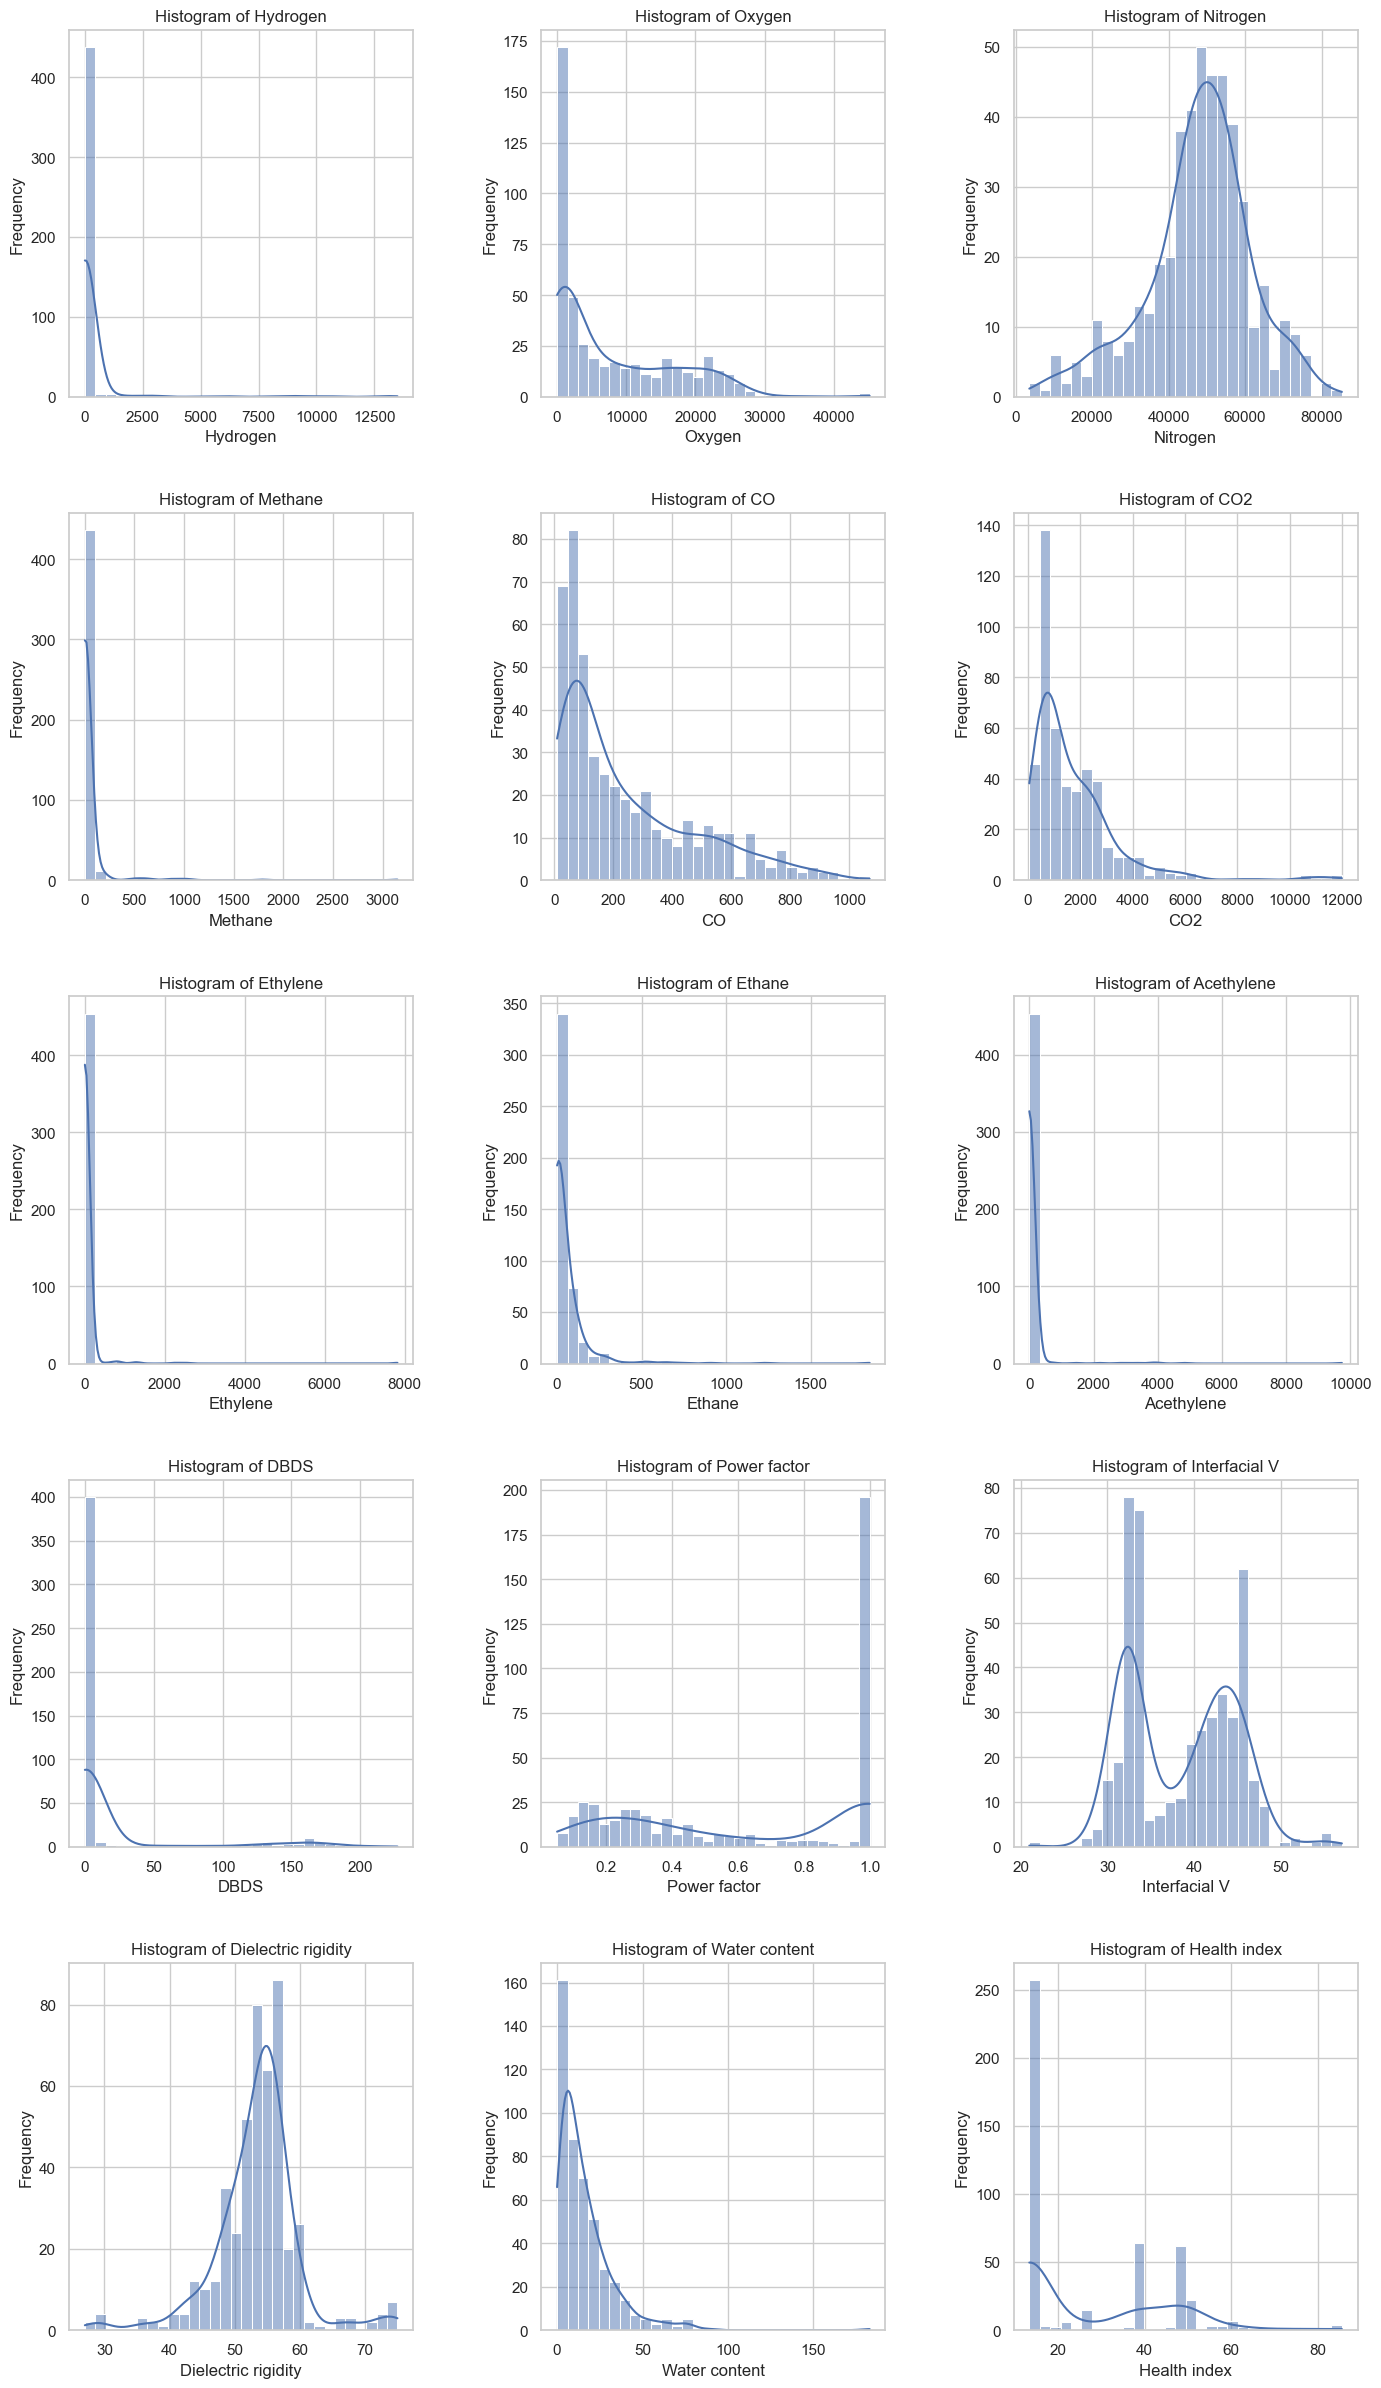

In [91]:
# Define the number of rows and columns for the subplot grid
num_cols = len(df.select_dtypes(include='number').columns)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)  # Calculate number of rows needed

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))
fig.tight_layout(pad=5.0)
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Plot histograms
numeric_cols = df.select_dtypes(include='number').columns
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(len(numeric_cols), len(axes)):
    axes[j].set_visible(False)

plt.show()


### 2. Box Plot
To visualize distributions and detect outliers:

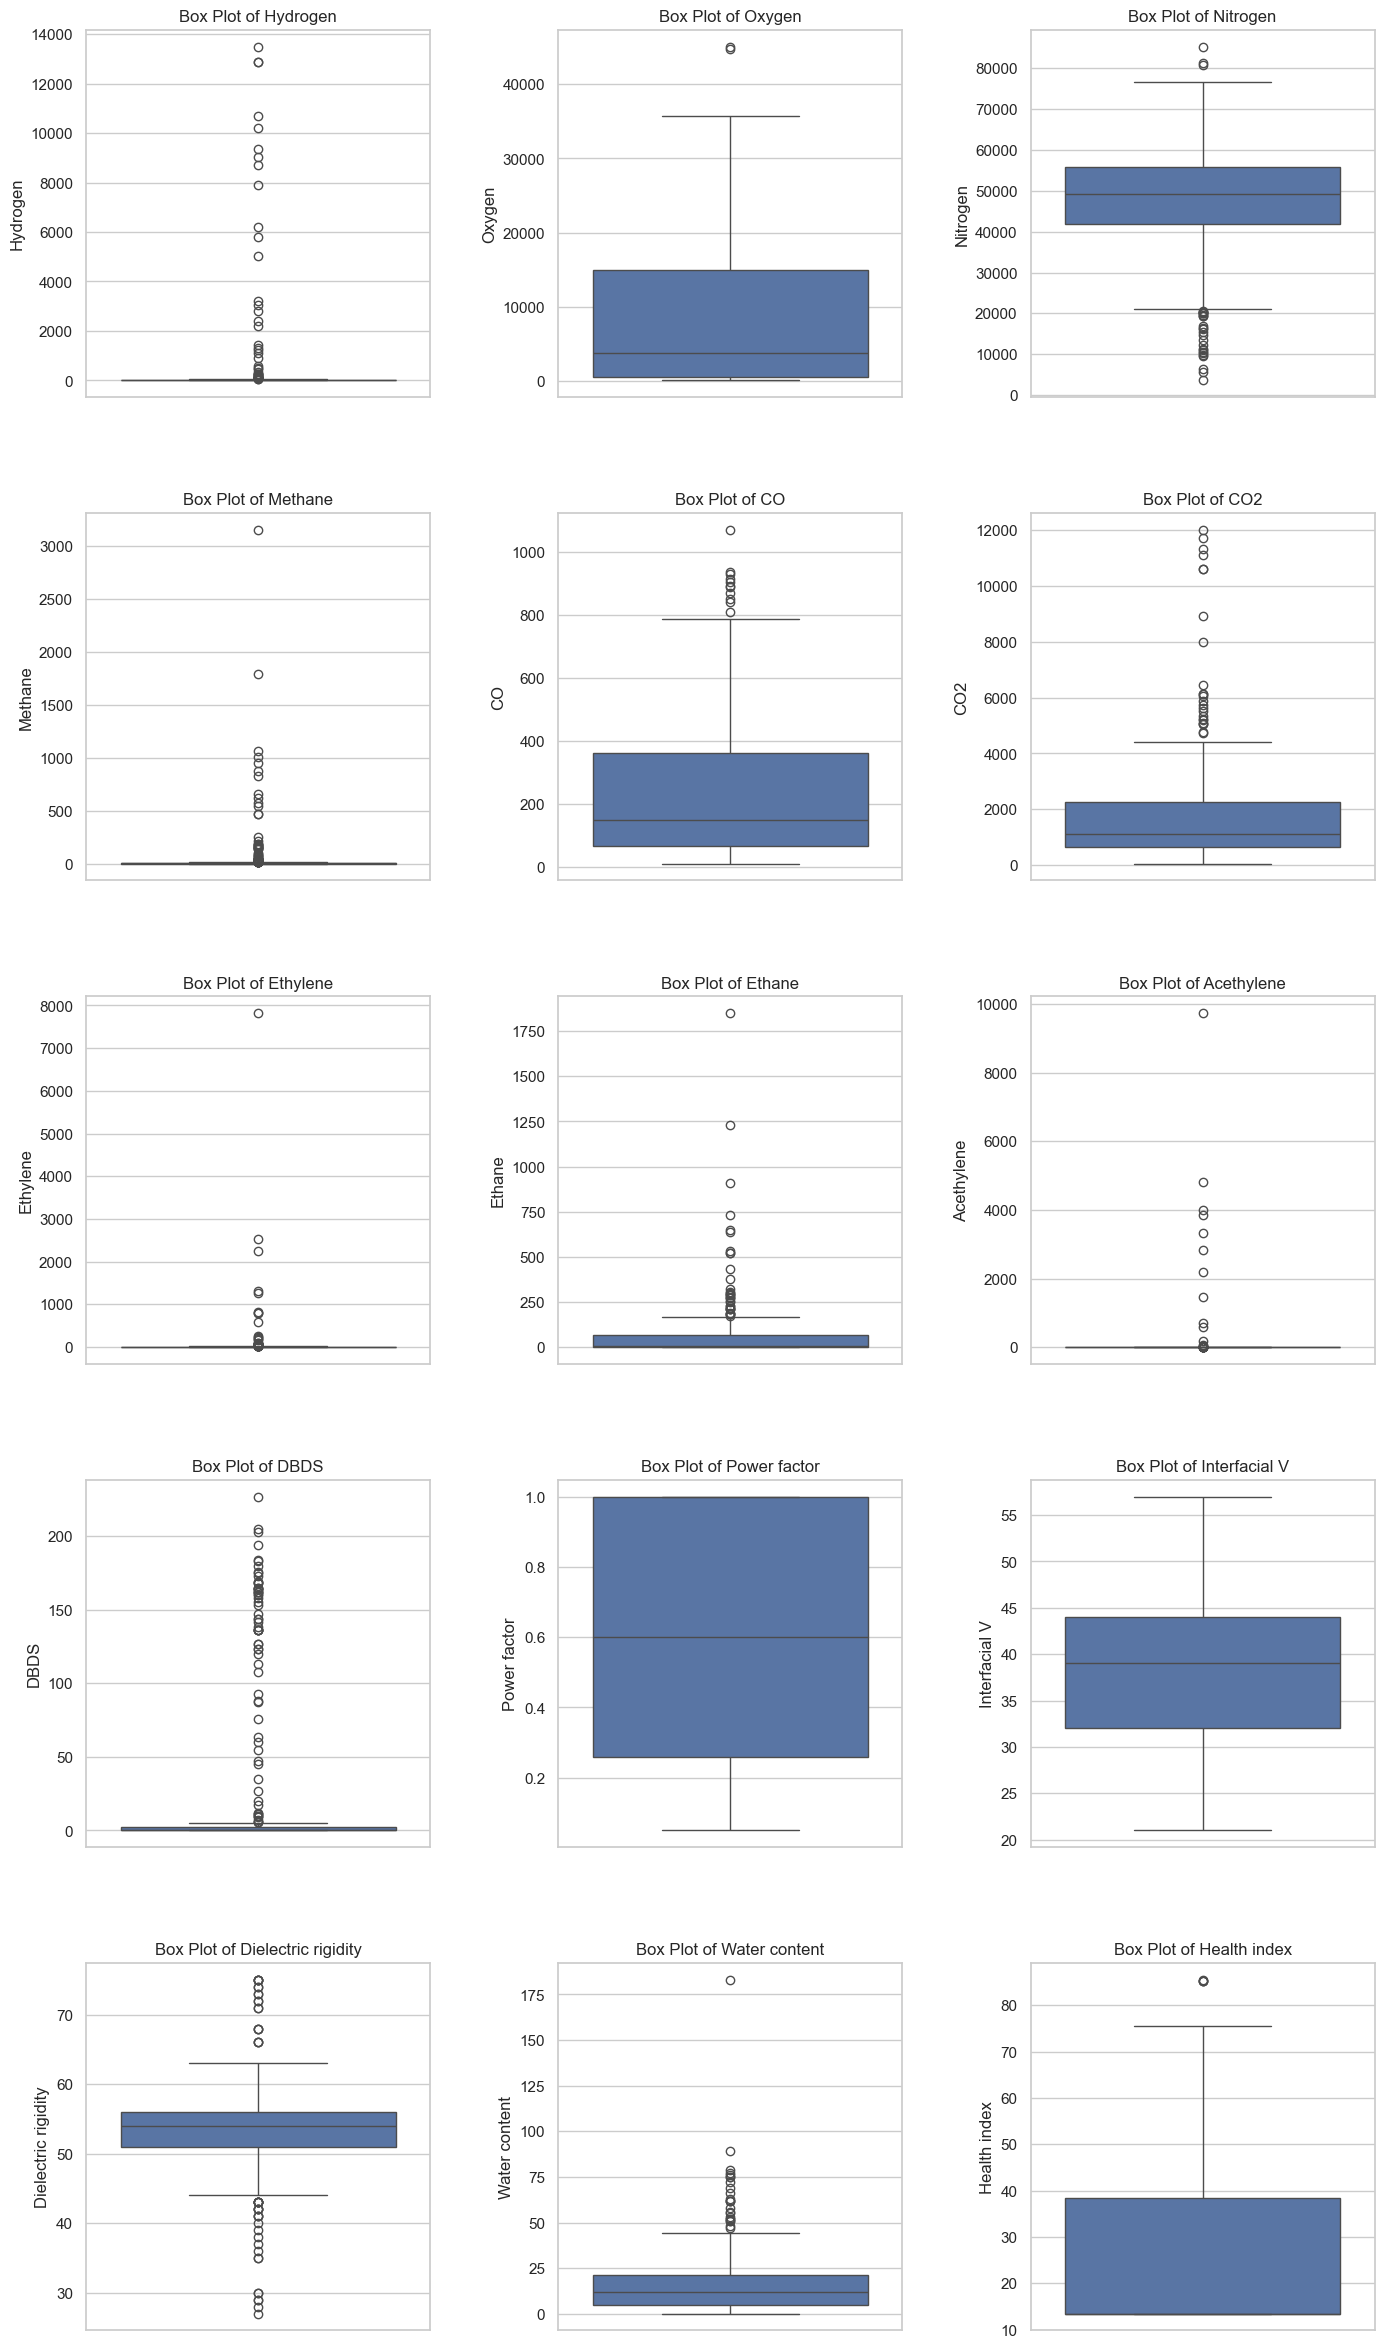

In [90]:
# Create a figure with subplots for box plots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))
fig.tight_layout(pad=5.0)
axes = axes.flatten()

# Plot box plots
for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_ylabel(col)

# Hide any unused subplots
for j in range(len(numeric_cols), len(axes)):
    axes[j].set_visible(False)

plt.show()

### 3. Pair Plot
For a comprehensive view of pairwise relationships:

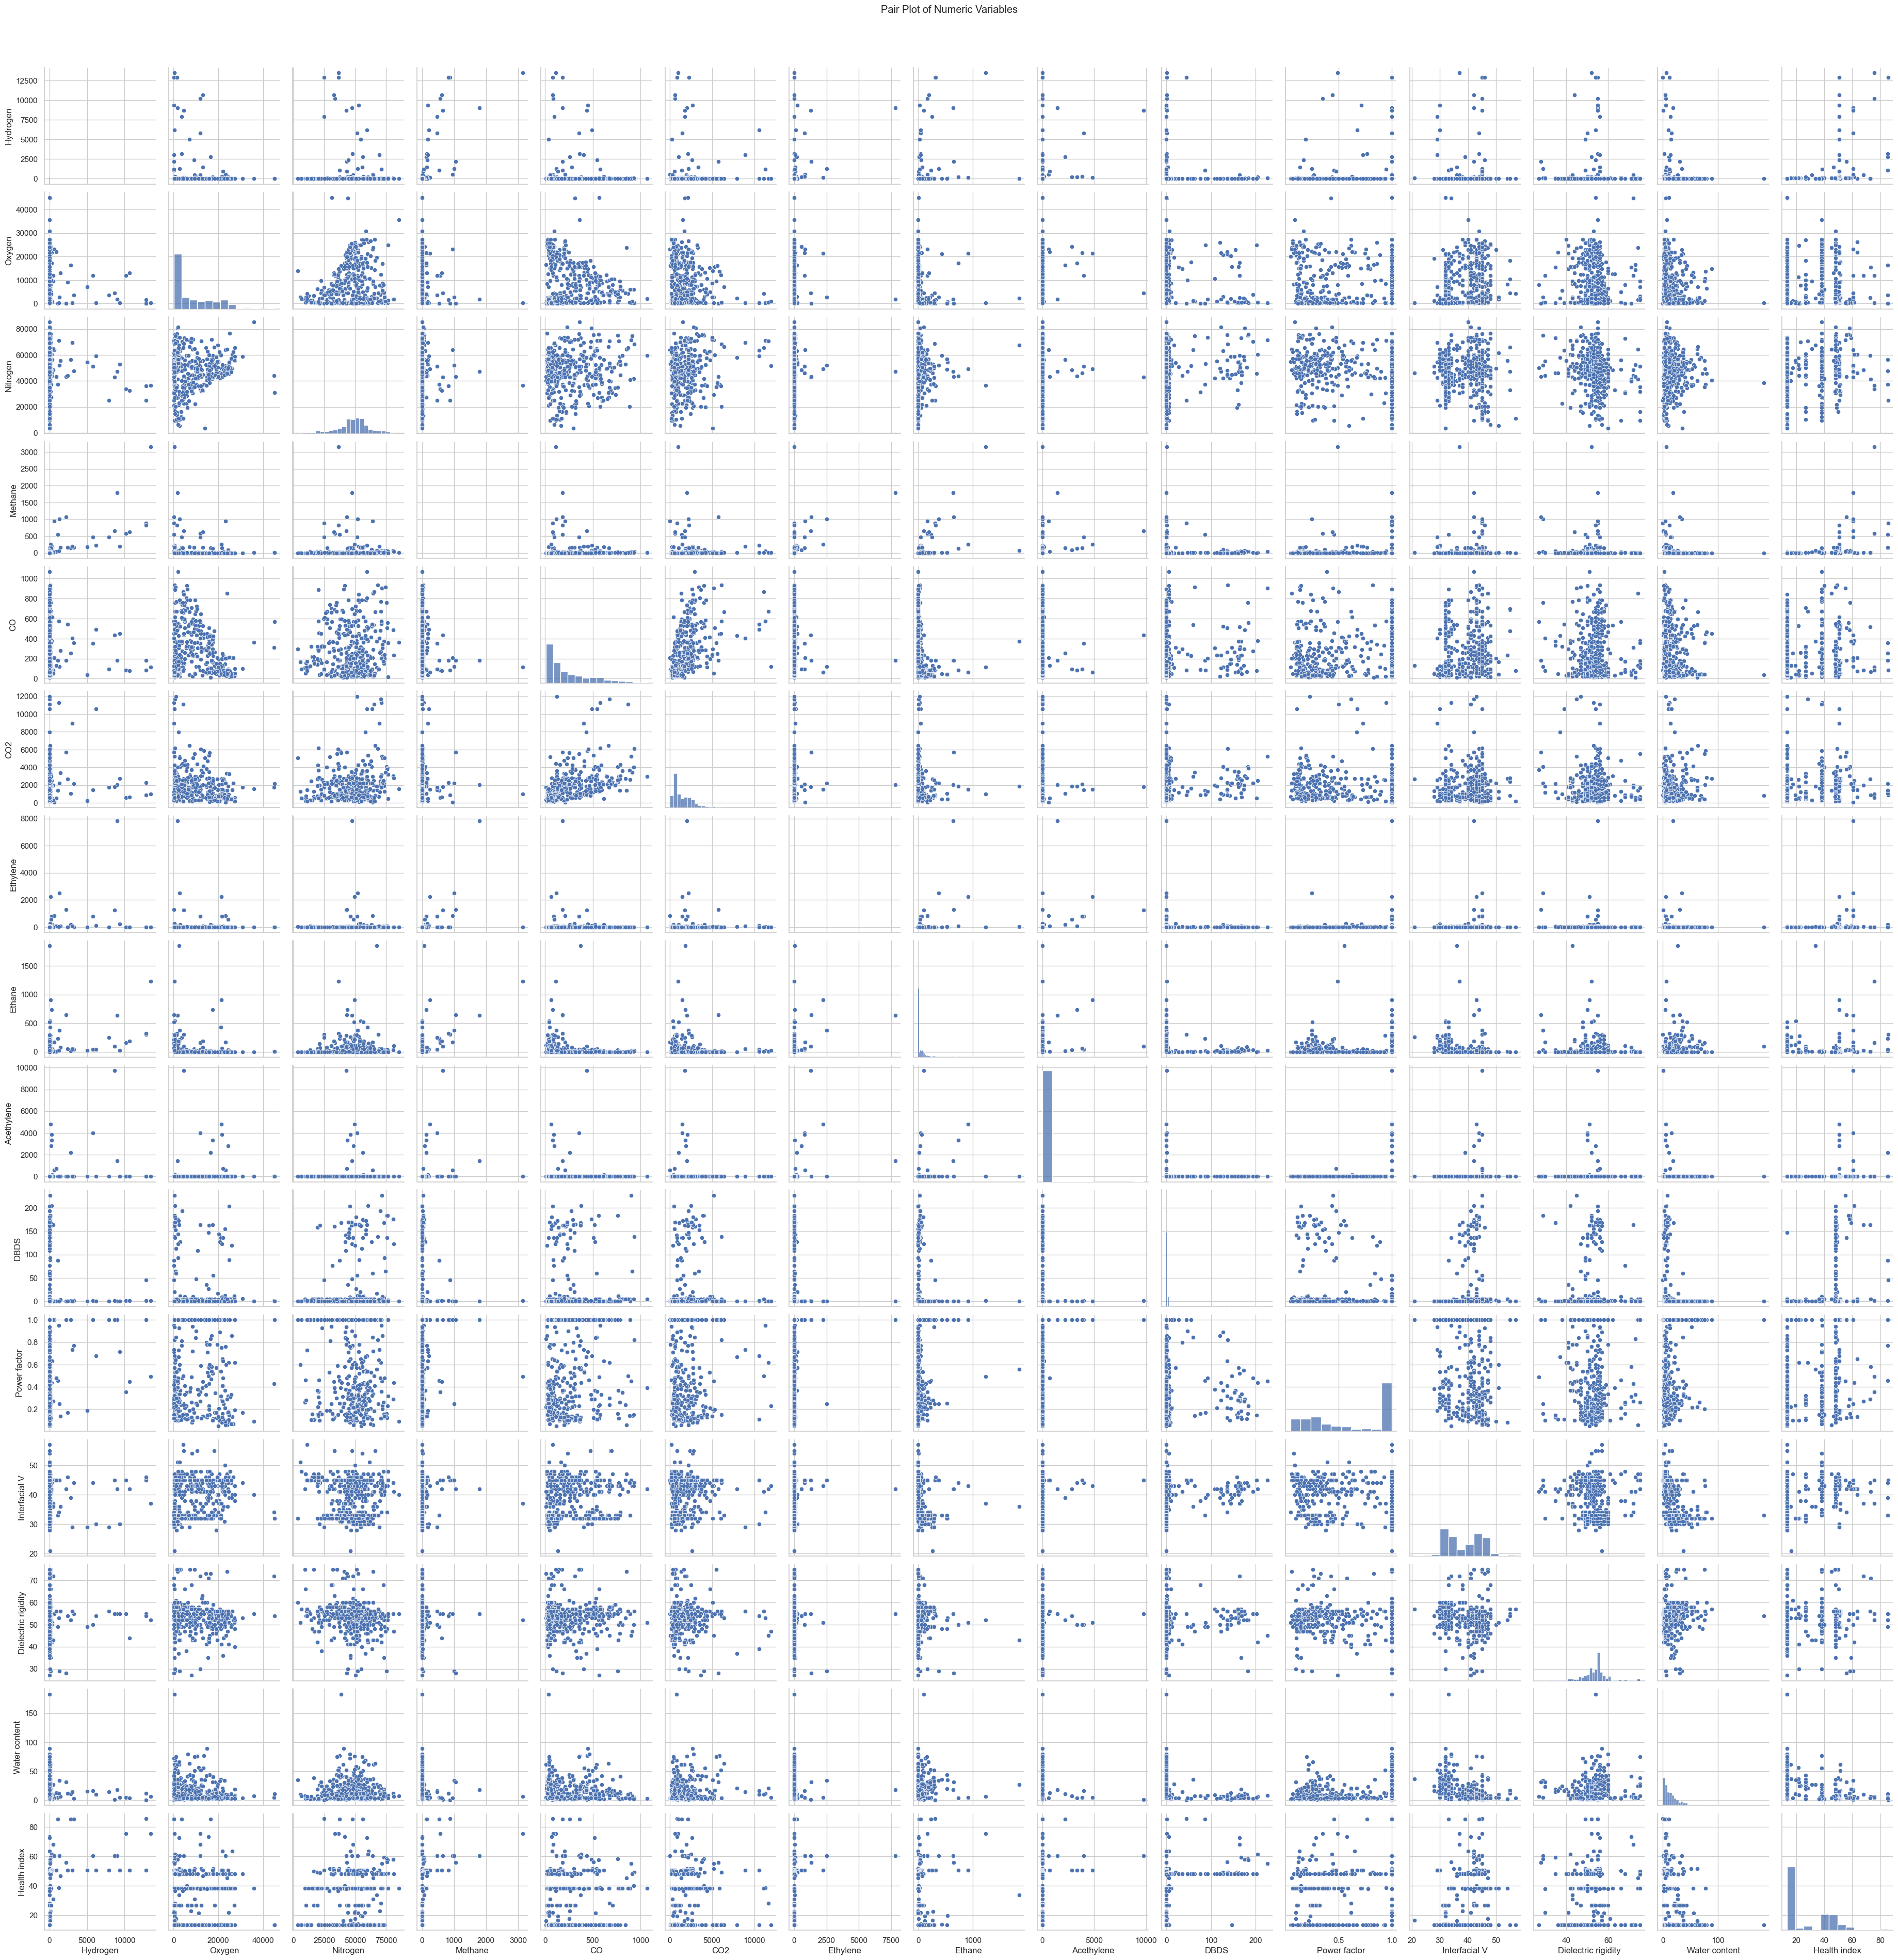

In [93]:
# Create a pair plot
sns.pairplot(df[numeric_cols])
plt.suptitle('Pair Plot of Numeric Variables', y=1.02)
plt.show()

### 4. Correlation Heatmap
To visualize the correlations between variables:

In [94]:
# Compute the correlation matrix
correlation_matrix = df[numeric_cols].corr()

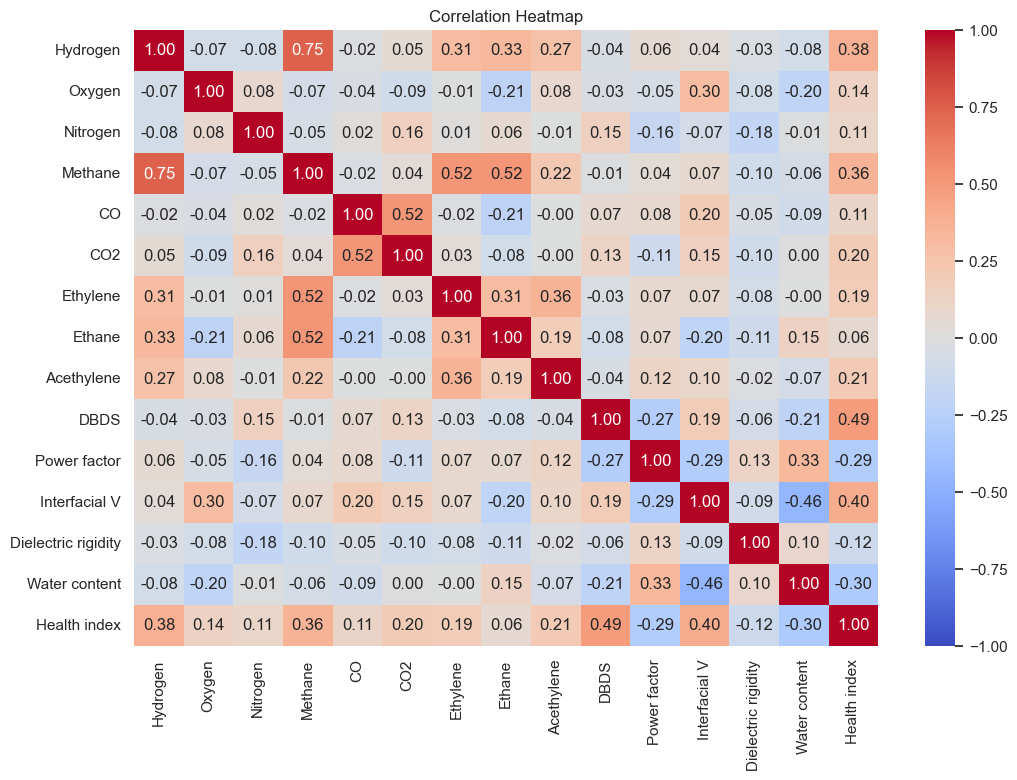

In [95]:
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

### Correlation with Health Index

In [96]:
# Compute and display correlation with 'Health index'
health_index_col = 'Health index'
correlations = df.corr()[health_index_col]

In [97]:
print("\nCorrelation with Health Index:")
print(correlations)


Correlation with Health Index:
Hydrogen               0.375171
Oxygen                 0.136489
Nitrogen               0.108785
Methane                0.363219
CO                     0.112956
CO2                    0.203058
Ethylene               0.189952
Ethane                 0.064073
Acethylene             0.210743
DBDS                   0.491709
Power factor          -0.289037
Interfacial V          0.400666
Dielectric rigidity   -0.117358
Water content         -0.300724
Health index           1.000000
Name: Health index, dtype: float64


### Analysis On Power Factor

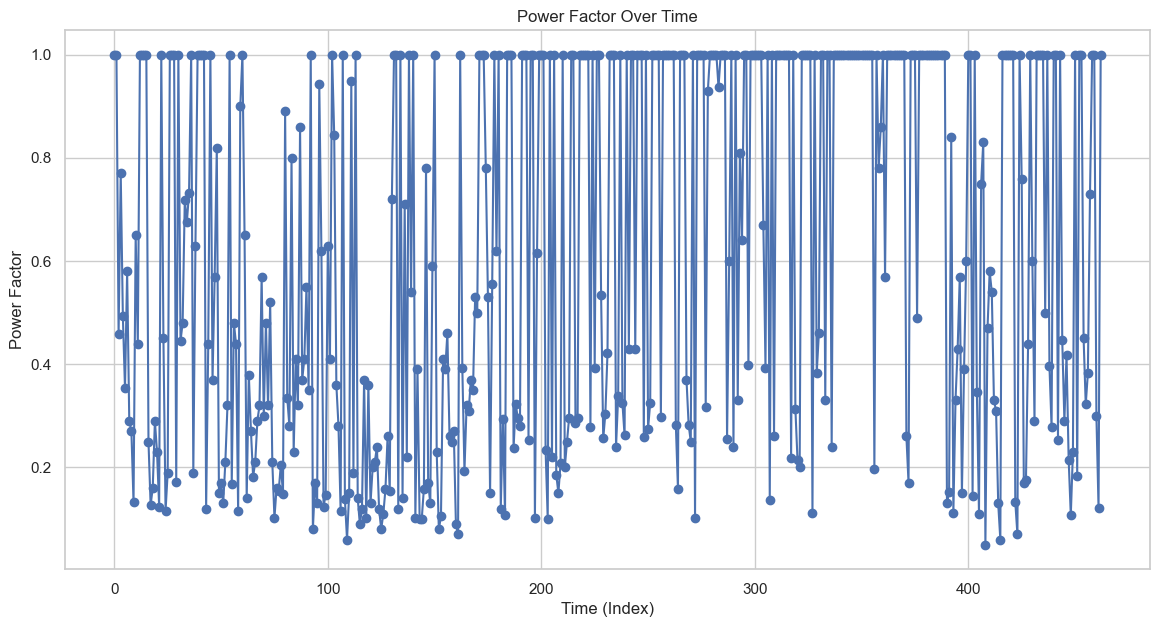

In [99]:
# Add an index to simulate time
df['Time'] = range(len(df))

# Plotting Time Series Line Chart
plt.figure(figsize=(14, 7))
plt.plot(df['Time'], df['Power factor'], color='b', marker='o', linestyle='-')

plt.title('Power Factor Over Time')
plt.xlabel('Time (Index)')
plt.ylabel('Power Factor')
plt.grid(True)
plt.show()

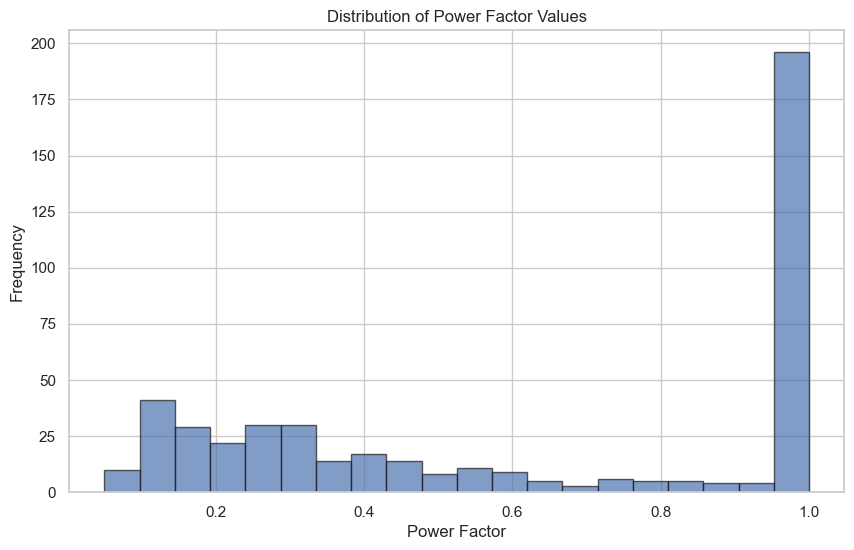

In [101]:
# Plotting Histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Power factor'], bins=20, edgecolor='k', alpha=0.7)

plt.title('Distribution of Power Factor Values')
plt.xlabel('Power Factor')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Analysis On Gases

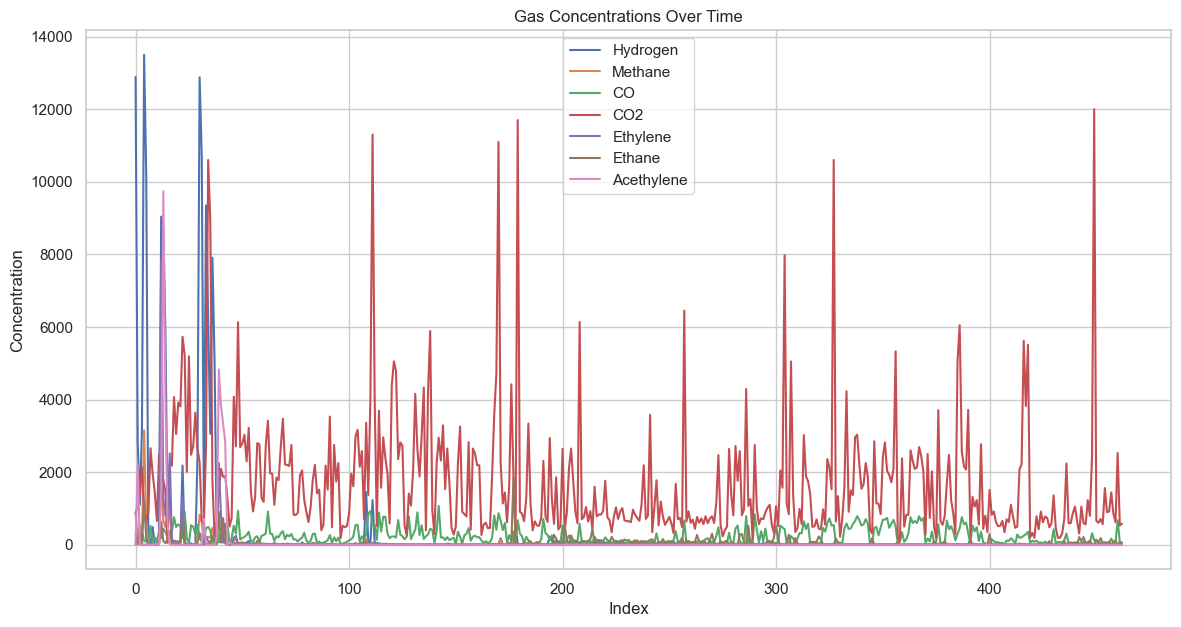

In [103]:
# Plotting Time Series Line Charts
plt.figure(figsize=(14, 7))
for column in ['Hydrogen', 'Methane', 'CO', 'CO2', 'Ethylene', 'Ethane', 'Acethylene']:
    plt.plot(df['Time'], df[column], label=column)

plt.title('Gas Concentrations Over Time')
plt.xlabel('Index')
plt.ylabel('Concentration')
plt.legend()
plt.grid(True)
plt.show()


#### Heatmap

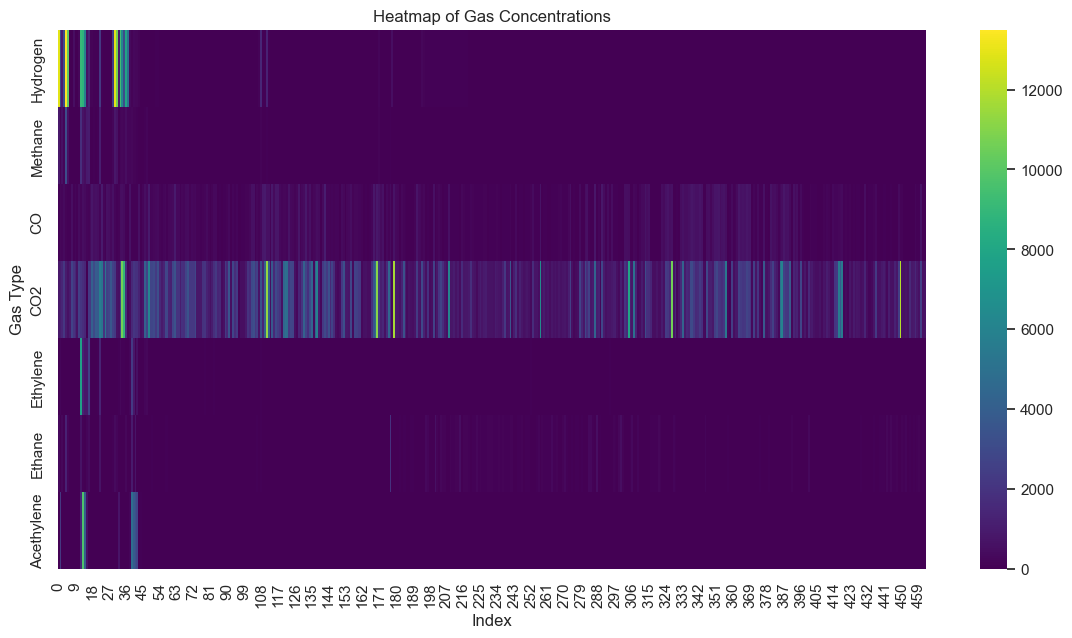

In [109]:
# Set the index for the heatmap
heatmap_data = df.set_index('Time')

# Plotting Heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(heatmap_data[['Hydrogen', 'Methane', 'CO', 'CO2', 'Ethylene', 'Ethane', 'Acethylene']].T, cmap='viridis', annot=False)

plt.title('Heatmap of Gas Concentrations')
plt.xlabel('Index')
plt.ylabel('Gas Type')
plt.show()

### 3. Interfacial Voltage
**Purpose:** Assess the integrity of insulation by measuring voltage between different materials or phases.

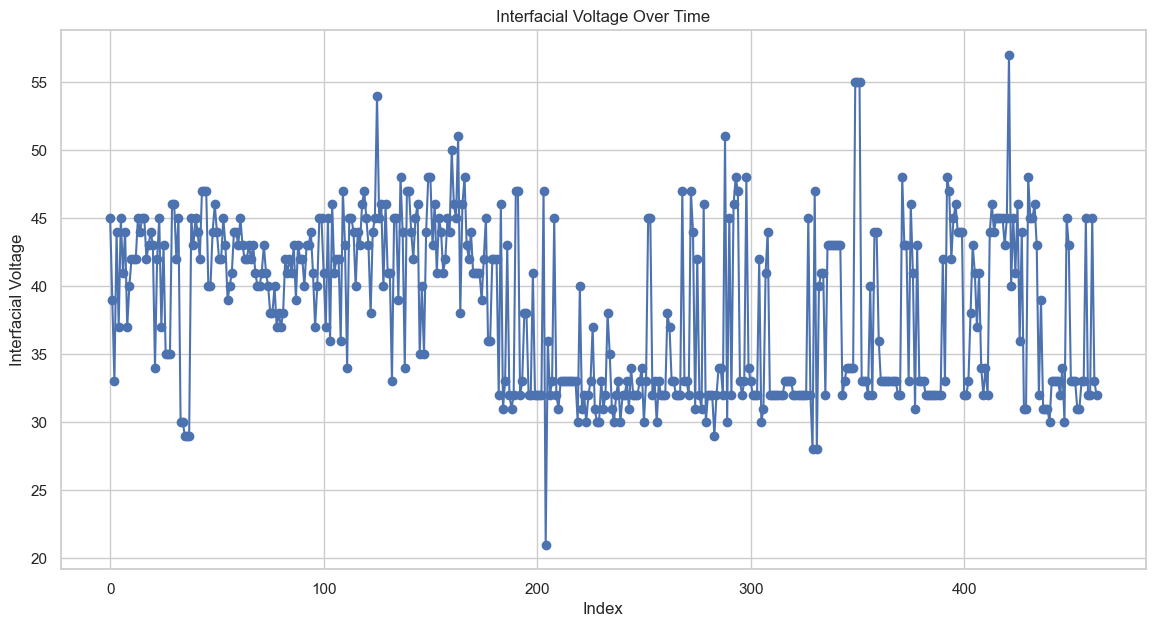

In [112]:
# Plotting Line Chart
plt.figure(figsize=(14, 7))
plt.plot(df['Time'], df['Interfacial V'], color='b', marker='o', linestyle='-')

plt.title('Interfacial Voltage Over Time')
plt.xlabel('Index')
plt.ylabel('Interfacial Voltage')
plt.grid(True)
plt.show()

#### Scatter Plot
A scatter plot can be used to show the relationship between interfacial voltage and another variable, such as gas concentrations or time.

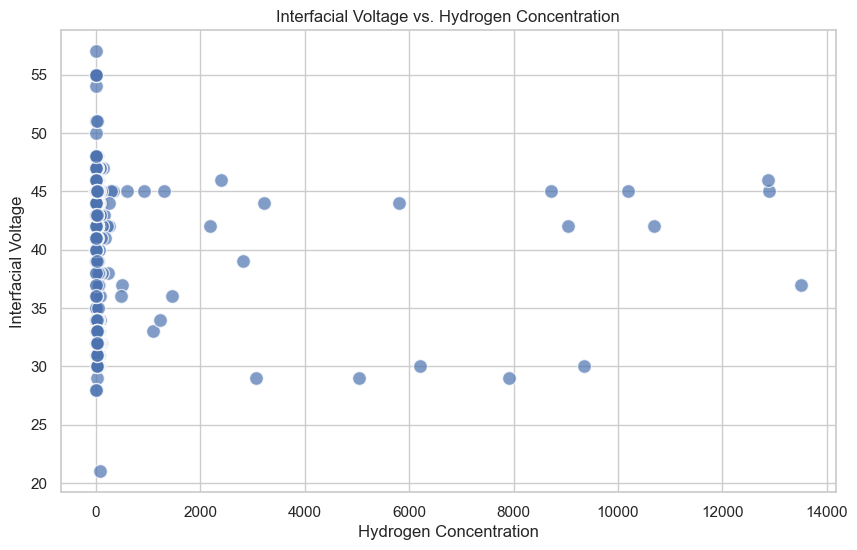

In [113]:
# Scatter Plot of Interfacial Voltage vs. Hydrogen Concentration
plt.figure(figsize=(10, 6))
plt.scatter(df['Hydrogen'], df['Interfacial V'], alpha=0.7, edgecolors='w', s=100)

plt.title('Interfacial Voltage vs. Hydrogen Concentration')
plt.xlabel('Hydrogen Concentration')
plt.ylabel('Interfacial Voltage')
plt.grid(True)
plt.show()

### Radar Chart

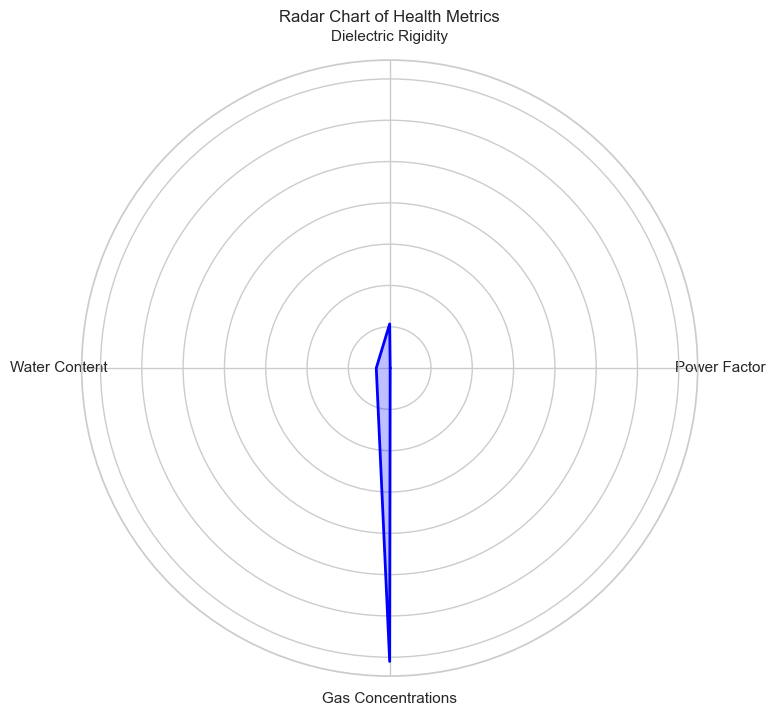

In [125]:
metrics = {
    'Power Factor': df['Power factor'].mean(),
    'Dielectric Rigidity': df['Dielectric rigidity'].mean(),
    'Water Content': df['Water content'].mean(),
    'Gas Concentrations': df[['Hydrogen', 'Methane', 'CO', 'CO2', 'Ethylene', 'Ethane', 'Acethylene']].mean().mean()
}

# Create radar chart
labels = list(metrics.keys())
values = list(metrics.values())

# Number of variables
num_vars = len(labels)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
values += values[:1]
angles += angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='blue', alpha=0.25)
ax.plot(angles, values, color='blue', linewidth=2)

# Labels
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

plt.title('Radar Chart of Health Metrics')
plt.show()

### Composite Visculization

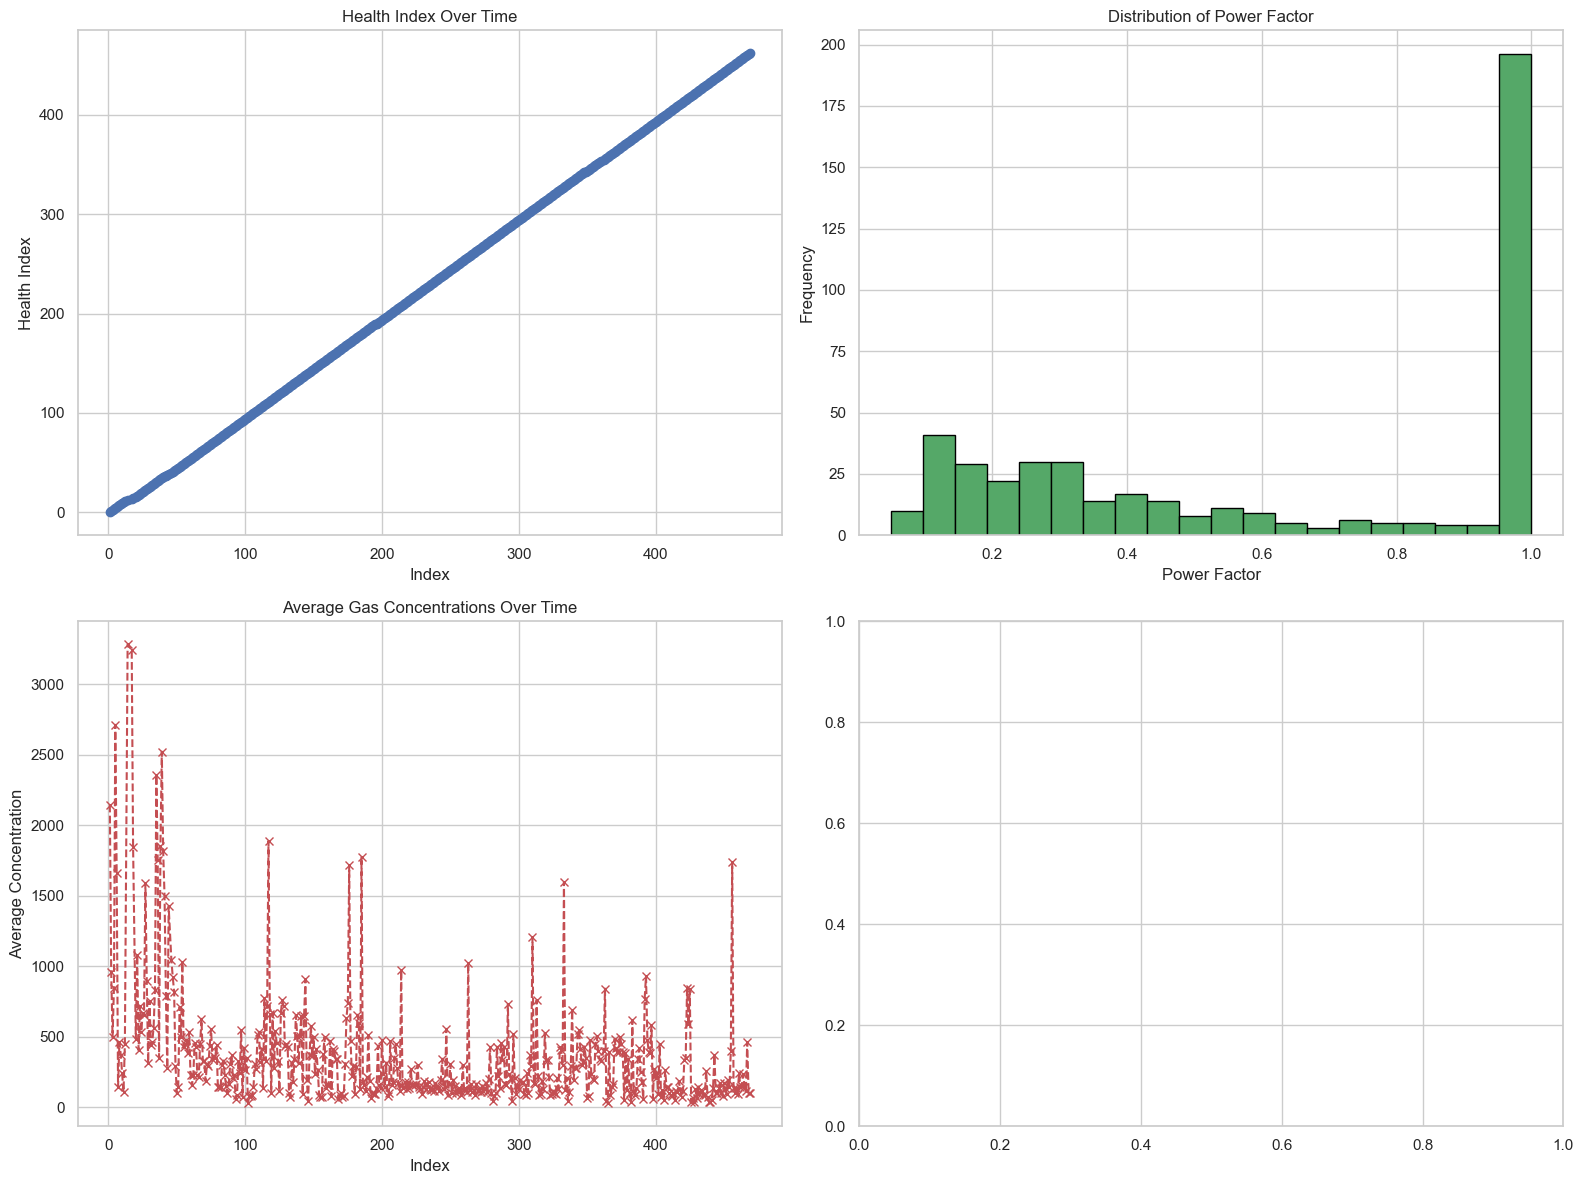

In [124]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Plot Health Index Over Time
axs[0, 0].plot(df.index, df['Index'], color='b', marker='o', linestyle='-')
axs[0, 0].set_title('Health Index Over Time')
axs[0, 0].set_xlabel('Index')
axs[0, 0].set_ylabel('Health Index')

# Plot Power Factor Distribution
axs[0, 1].hist(df['Power factor'], bins=20, color='g', edgecolor='black')
axs[0, 1].set_title('Distribution of Power Factor')
axs[0, 1].set_xlabel('Power Factor')
axs[0, 1].set_ylabel('Frequency')

# Plot Gas Concentrations (Time Series)
axs[1, 0].plot(df.index, df[['Hydrogen', 'Methane', 'CO', 'CO2', 'Ethylene', 'Ethane', 'Acethylene']].mean(axis=1), color='r', marker='x', linestyle='--')
axs[1, 0].set_title('Average Gas Concentrations Over Time')
axs[1, 0].set_xlabel('Index')
axs[1, 0].set_ylabel('Average Concentration')

# Adjust layout
plt.tight_layout()
plt.show()